In [1]:
#importing the libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.common.exceptions import NoSuchElementException, TimeoutException,ElementClickInterceptedException
from selenium.webdriver.support import expected_conditions as EC
import time
from datetime import datetime,timedelta
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
#accessing website
url = "https://www.instagram.com/"

In [3]:
#creating the driver for automation process
driver = webdriver.Chrome()
driver.maximize_window()
driver.get(url)
wait = WebDriverWait(driver,10)

In [4]:
#mentioning the username and password
username = "username"
password = "password"

# Login 

In [5]:
def login(username,password):
    try:
        time.sleep(1)
        driver.find_element(By.XPATH,"//*[@id='loginForm']/div/div[1]/div/label/input").send_keys(username)
        driver.find_element(By.XPATH,"//*[@id='loginForm']/div/div[2]/div/label/input").send_keys(password)
        driver.find_element(By.XPATH,"//*[@id='loginForm']/div/div[3]").click()
        #Going through popups
        pop = wait.until(EC.presence_of_element_located((By.XPATH,".//div[(@class='_ac8f')]/div")))
        pop.click()
        #closing the notification popup
        notify = wait.until(EC.presence_of_element_located((By.XPATH,".//div[(@class='_a9-z')]/button[2]")))
        notify.click()
    except TimeoutException:
        print("Something is Wrong")

In [6]:
login(username,password)

## Getting profile name from search 

In [7]:
def search(s):
    try:
        #opening search box for search operation
        time.sleep(3)
        wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,"Search"))).click()
        search = wait.until(EC.presence_of_element_located((By.XPATH,".//div[(@class ='xjoudau x6s0dn4 x78zum5 xdt5ytf x1c4vz4f xs83m0k xrf2nzk x1n2onr6 xh8yej3 x1hq5gj4')]/input")))
        search.send_keys(s)
        #extracting usernames
        wait.until(EC.presence_of_element_located((By.XPATH,".//div[(@class = 'x9f619 x1n2onr6 x1ja2u2z x78zum5 x1iyjqo2 xs83m0k xeuugli x1qughib x6s0dn4 x1a02dak x1q0g3np xdl72j9')]/div/div/div/span")))
        handel_name = driver.find_elements(By.XPATH,".//div[(@class = 'x9f619 x1n2onr6 x1ja2u2z x78zum5 x1iyjqo2 xs83m0k xeuugli x1qughib x6s0dn4 x1a02dak x1q0g3np xdl72j9')]/div/div/div/span")
        names = []
        for i in handel_name:
            if i.text[0] != "#":
                names.append(i.text.split('\n')[0])
        time.sleep(3)
        driver.refresh()
        return names
    except TimeoutException:
        print("Something is Wrong")

In [8]:
#searching for profile with food in there name
search('food')

['foodtalkindia',
 'foodelhi',
 'foodie_flatlay',
 'foodiesince96',
 'food_lunatic',
 'foodklick',
 'food',
 'mumbaifoodjunkie',
 'thelittlefoodjournal',
 'littlefoodco',
 'foodiee_ishh',
 'pune_food_blogger',
 'foodbellydelites',
 'delicious_destination._',
 'phorumpandya',
 'foodiesdelhite',
 'meghnasfoodmagic',
 'foodie_incarnate',
 'lifeofprachi._',
 'foodalong',
 'foodconnectindia',
 'the_foodiediaries',
 'delhi_food_shaukeen',
 'eatlikeamaniac',
 'whaaatislife',
 'delishdirection',
 'thepunefoodie',
 'foodbabyny',
 'thegrubjournal',
 'yourfoodlab',
 'food_feels',
 'usa.explores',
 'mumbaifoodie',
 'foodiesofindia',
 'tanviz_dream_oven',
 'mccainfoods_india',
 'hungry.backpackers',
 'foodbloggerai',
 'sahil_foodvlogs',
 'divitya_dalwani',
 'savorytales',
 'delhifoodwalks',
 'foodhallindia',
 'tashasartisanfoods',
 'being_a_food_vlogger_',
 'mofpi_goi',
 'maldives.explores',
 'binjalsvegkitchen']

# Searching and opening the profile

##### we will use this function later inside other function for there process.

In [9]:
def search_open(s):
    try:
        #locating Search Box and Sending text for the search
        wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,"Search"))).click()
        search = wait.until(EC.presence_of_element_located((By.XPATH,".//div[(@class ='xjoudau x6s0dn4 x78zum5 xdt5ytf x1c4vz4f xs83m0k xrf2nzk x1n2onr6 xh8yej3 x1hq5gj4')]/input")))
        search.send_keys(s)
        
        #Checking the result
        result = wait.until(EC.presence_of_element_located((By.XPATH,".//div[@class = 'x9f619 x78zum5 xdt5ytf x1iyjqo2 x6ikm8r x1odjw0f xh8yej3 xocp1fn']/a")))
        result.click()
        
        time.sleep(5)
    except TimeoutException:
        print('Something Wrong with the search and open OP')

# 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

###### 1. From the list of instagram handles you obtained when you searched 'food' in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [10]:
#first 10 profile from the search 
handles = ['foodtalkindia','foodie_flatlay','foodelhi','fooodie_punjabi','thelittlefoodjournal','food_lunatic','food','foodiesince96','foodklick','mumbaifoodjunkie']

In [11]:
#function for getting top 5 handle which have highest number of followers
def top_handle(lst):
    try:
        #creating a Dictionary that will contain the profile name and the No. of Folowers
        dct = {}
        for i in lst:
            time.sleep(2)
            search_open(i)
            
           #getting the follow count 
            followers_val_count = wait.until(EC.presence_of_element_located((By.XPATH,".//li[@class ='xl565be x1m39q7l x1uw6ca5 x2pgyrj']/div/a/span")))
            dct[i] = int(followers_val_count.get_attribute('title').replace(',' , ''))
        #top 5 most followed followers being sorted here
        sorted_handles = OrderedDict(sorted(dct.items(), key=lambda item: item[1], reverse=True)[:5])
        
        return sorted_handles
    except TimeoutException:
        print("Timeout, TRY AGAIN")   

In [12]:
#storing the names of handle in a variable
top_handle = top_handle(handles)

In [13]:
print('Top 5 Instagram handles which have the highest number of followers:')
for user_name, follower_count in top_handle.items():
    print(f"{user_name} -> {follower_count}")

Top 5 Instagram handles which have the highest number of followers:
foodklick -> 371963
foodiesince96 -> 339092
foodtalkindia -> 308762
food -> 308762
foodelhi -> 252841


##### 2. Now Find the number of posts these handles have done in the previous 3 days.

In [14]:
#This function will return the count of post posted by the user in past 3 days
def count_of_post(day):
    try:
        #locating the first Post
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
        time.sleep(2)
        driver.execute_script('window.scrollTo(0,document.body.scrollTop);')
        time.sleep(2)
        post = driver.find_element(By.CLASS_NAME,"_aagu")
        post.click()
        count = 0
        
        while True:
            #Getting info of the posted media
            info = driver.find_element(By.CLASS_NAME,"x1p4m5qa")
            
            #getting the date in string format
            date_string = info.get_attribute('datetime')
            
            #converting the date into acceptable format for anaylsis
            
            date = datetime.strptime(date_string[0:19],"%Y-%m-%dT%H:%M:%S")
            
            #calculating the Diffrence in posted date and current date
            
            if (datetime.now()-date).days>day:
                break
            else:
                count += 1
            #locating next button
            time.sleep(1)
            next_button = wait.until(EC.presence_of_element_located((By.XPATH,".//div[@class = ' _aaqg _aaqh']")))
            next_button.click()
        #closing the post 
        time.sleep(1)
        close_post = driver.find_element(By.XPATH,".//div[@class ='x160vmok x10l6tqk x1eu8d0j x1vjfegm']/div")
        close_post.click()
        return count
    except TimeoutException:
        print("Timeout, TRY AGAIN...")

In [15]:
total_post_count = {}
for i in top_handle :
    time.sleep(3)
    search_open(i)
    count = count_of_post(3)
    total_post_count[i] = count

In [16]:
print('Number of posts these handles have done in the previous 3 days : -')
for i in total_post_count:
    print(i,total_post_count[i])

Number of posts these handles have done in the previous 3 days : -
foodklick 0
foodiesince96 4
foodtalkindia 2
food 2
foodelhi 0


##### 3. Depict this information using a suitable graph.

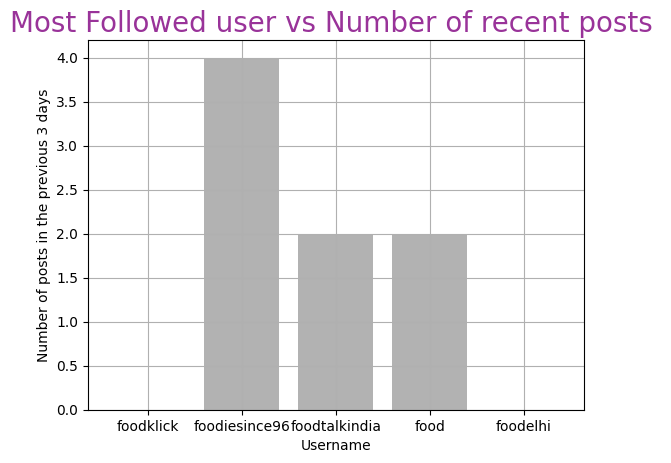

In [17]:
# using total_post_count to get username and number of post
x = total_post_count.keys()
y = total_post_count.values()
plt.bar(x,y,color='grey',alpha=0.6)
plt.ylabel("Number of posts in the previous 3 days",size=10)
plt.xlabel("Username",size=10)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='purple',alpha=0.8)
plt.grid()
plt.show()

# 2. Your friend also needs a list of hashtags that he should use in his posts. 

##### 1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [18]:
def extract_contents(lst):
    try:
        hashtag_list = []
        for users in lst:
            search_open(users)
            time.sleep(1)
            #scrolling the page to get the view
            driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
            time.sleep(1)
            driver.execute_script('window.scrollTo(0,document.body.scrollTop);')
            time.sleep(1)
            
            #locating the post of the user
            post = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_aagu")))
            for i in post[:10]:
                i.click()
                time.sleep(2)
                #locating all the hashtag used in the post of the posted media
                hashtag = driver.find_elements(By.XPATH,".//a[@class ='x1i10hfl xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz  _aa9_ _a6hd']")
                for tagname in hashtag:
                    hashtag_list.append(tagname.text)
                    
                #locating the close button
                time.sleep(1)
                wait.until(EC.presence_of_element_located((By.XPATH,"/html/body/div[8]/div[1]/div/div[2]"))).click()
        return hashtag_list
    except TimeoutException:
        print("Timeout....TRY AGAIN")

In [19]:
handles = list(total_post_count.keys())
hashtags = extract_contents(handles)

In [20]:
print(hashtags)

['#chilli', '#garlic', '#paneer', '#paratha', '#spicy', '#chutney', '#soulfood', '#thali', '#reels', '#reelitfeelit', '#foodreels', '#reelsexplore', '#indianfood', '#tasty', '#desikhana', '#recipe', '#easyrecipes', '#tiffinideas', '#breakfast', '#kidsrecipes', '#food', '#foodbloggers', '#tasteofindia', '#foodreelsinindia', '#lunchideas', '#desifood', '#trending', '#reelvideo', '#chilli', '#tomato', '#spicy', '#dhaniya', '#tamatar', '#chutney', '#paratha', '#soulfood', '#thali', '#reels', '#reelitfeelit', '#foodreels', '#reelsexplore', '#indianfood', '#tasty', '#desikhana', '#bihari', '#food', '#foodbloggers', '#tasteofindia', '#foodreelsinindia', '#lunchideas', '#desifood', '#trending', '#reelvideo', '#angoor', '#grapes', '#panipuri', '#golgappe', '#comfortfood', '#streetfood', '#tangy', '#reels', '#spicy', '#reelitfeelit', '#summer', '#foodreels', '#reelsexplore', '#indianfood', '#foodporn', '#tasty', '#desikhana', '#homemade', '#dalchawal', '#foodbloggers', '#desikhana', '#tasteofind

##### 2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [21]:
dct = {}
words_list = []
for word in hashtags:
    dct[word] = dct.get(word,0) + 1
    
for i in sorted(dct, key=dct.get, reverse=True):
    words_list.append([i,dct[i]])
    print(i,dct[i])

#tasty 18
#reels 10
#reelitfeelit 10
#foodreels 10
#indianfood 10
#desikhana 10
#trending 10
#foodie 10
#food 9
#lunchideas 9
#desifood 9
#reelvideo 9
#foodiesince96 9
#soulfood 8
#thali 8
#foodbloggers 8
#foodporn 8
#recipe 7
#comfortfood 7
#chawhal 6
#healthy 6
#ricebowl 6
#yummy 6
#NewInTown 6
#reelsexplore 5
#foodreelsinindia 5
#dal 5
#achaar 5
#vegan 5
#yum 5
#best 5
#viral 4
#papad 4
#salad 4
#AGlassOfWorldClass 4
#Drinks 4
#Eateries 4
#GreaterKailash 4
#Delhi 4
#FoodTalkIndia 4
#foodelhi 4
#spicy 3
#tasteofindia 3
#chicken 3
#Foodelhi 3
#chilli 2
#garlic 2
#paratha 2
#chutney 2
#tomato 2
#streetfood 2
#punjabi 2
#rice 2
#cheese 2
#crispy 2
#foodblogger 2
#asmr 2
#khichdi 2
#favourite 2
#AtoZofrestaurantswithM 2
#delhi 2
#sushi 2
#pizza 2
#RoohAfza 2
#dimsum 2
#finedine 2
#Bars 2
#BestBars 2
#BestDrinks 2
#Food 2
#WorldClassCocktailFestival 2
#MakeItWorldClass 2
#WorldClass 2
#WorldClassIN 2
#WorldClass2024 2
#WorldClassIndia 2
#DelhiBakeries 2
#OGBakeries 2
#Patties 2
#Pastries 

##### 3. Create a csv file with two columns : the word and its frequency

In [22]:
df = pd.DataFrame(words_list,columns = ['Word','Frequency'])
#using .to_csv inbuilt pandas function for converting dataframe to csv & saving the csv file with data
df.to_csv(r'word_frequency.csv',index = False)
df.head(10)

,Word,Frequency
0,#tasty,18
1,#reels,10
2,#reelitfeelit,10
3,#foodreels,10
4,#indianfood,10
5,#desikhana,10
6,#trending,10
7,#foodie,10
8,#food,9
9,#lunchideas,9


##### 4. Now, find the hashtags that were most popular among these bloggers

In [23]:
print(words_list[0][0])

#tasty


###### 5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

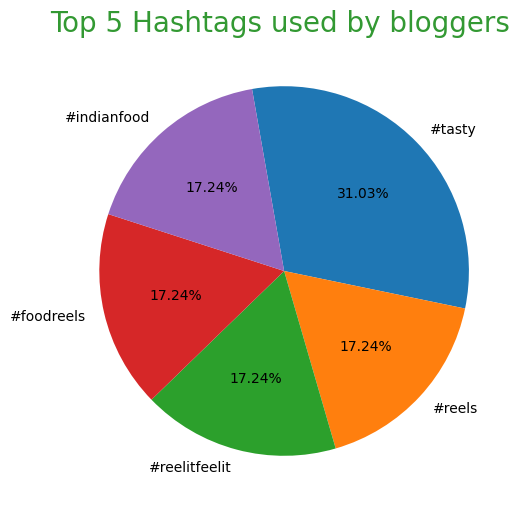

In [24]:
#using answer of problem 2.2
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=100)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='green',alpha=0.8)
plt.show()

# 3. You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:
1. Finding out the number of likes of the top 10 posts of the 5 handles obtained earlier.

In [25]:
def get_likes(user):
    try:
        likes = []
        #using this function to search and open the profile of the user
        search_open(user)
        time.sleep(1)
        
        #scrolling the page to get the post in the view range for further process
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
        time.sleep(1)
        driver.execute_script("window.scrollTo(0,document.body.scrollTop);")
        time.sleep(1)
        
        #locating the post of the user
        posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_aagu")))
        for i in posts[:10]:
            i.click()
            time.sleep(1)
            try:
                like = driver.find_element(By.XPATH,".//section[@class ='x12nagc x182iqb8 x1pi30zi x1swvt13']/div/div/span/a/span/span")
                no_of_likes = (like.text).replace(",","")
                likes.append(int(no_of_likes))
                time.sleep(1)
            #if any post has there likes hidden then we will mention 1 in place of like value so we can continue with function.
            except NoSuchElementException :
                #appending the value of likes as 1 so we can get the average for like to follow ratio without error
                likes.append(int(1))
                time.sleep(1)
            except ElementClickInterceptedException as e:
                print(e)
            finally:
                #locating the close button
                time.sleep(1)
                wait.until(EC.presence_of_element_located((By.XPATH,"/html/body/div[8]/div[1]/div/div[2]"))).click()
                time.sleep(1)
        return likes
    except TimeoutException as e:
        print(e)

In [26]:
#dct will store username with list of likes
dct = {}
for user in handles : 
    likes = get_likes(user)
    dct[user] = likes
    print('Number of likes of the top 10 posts of',user,':')
    for i in likes :
        print(i,'Likes')
    print()

Number of likes of the top 10 posts of foodklick :
24563 Likes
93016 Likes
136241 Likes
421 Likes
787 Likes
3102 Likes
4657 Likes
2604 Likes
6999 Likes
3897 Likes

Number of likes of the top 10 posts of foodiesince96 :
1 Likes
1 Likes
1 Likes
1 Likes
1 Likes
1 Likes
1 Likes
1 Likes
1 Likes
1 Likes

Number of likes of the top 10 posts of foodtalkindia :
46 Likes
53 Likes
34 Likes
137 Likes
225 Likes
7122 Likes
67 Likes
72 Likes
48 Likes
233 Likes

Number of likes of the top 10 posts of food :
46 Likes
53 Likes
34 Likes
137 Likes
225 Likes
7122 Likes
67 Likes
72 Likes
48 Likes
233 Likes

Number of likes of the top 10 posts of foodelhi :
1546 Likes
53647 Likes
2099 Likes
1 Likes
1234 Likes
1 Likes
1 Likes
1454 Likes
1339 Likes
1 Likes



##### 2. Calculate the average likes for a handle.

In [27]:
#This function will return a dictionary of {'username':average like}
def get_avg_likes(d):
    avg_likes = {}
    for key,val in d.items():
        avg = sum(val) // 10
        avg_likes[key] = avg
    return avg_likes

In [28]:
avg_likes = get_avg_likes(dct)

print('Average likes for each handle are :')
for user,likes in avg_likes.items():
    print(user, ':', likes)

Average likes for each handle are :
foodklick : 27628
foodiesince96 : 1
foodtalkindia : 803
food : 803
foodelhi : 6132


##### 3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [29]:
def average_to_like_ratio(top_handle,avg_likes,user):
    follow_like = {}
    for i in range(5):
        follow_like[user[i]] = top_handle[user[i]]//avg_likes[user[i]]
    return follow_like

In [30]:
#using the value from top_handle from (problem 1.1) which contains a dictionary of {'username':followers} which is top_handles
#extracing username from top_handles
top_handles_names = list(top_handle.keys())
#now calling above function  
avg_fol_like_ratio = average_to_like_ratio(top_handle, avg_likes, top_handles_names)
print('Average followers:like ratio of each handle :')
for user,ratio in avg_fol_like_ratio.items():
    print(user, ':', ratio)

Average followers:like ratio of each handle :
foodklick : 13
foodiesince96 : 339092
foodtalkindia : 384
food : 384
foodelhi : 41


##### 4. Create a bar graph to depict the above obtained information.

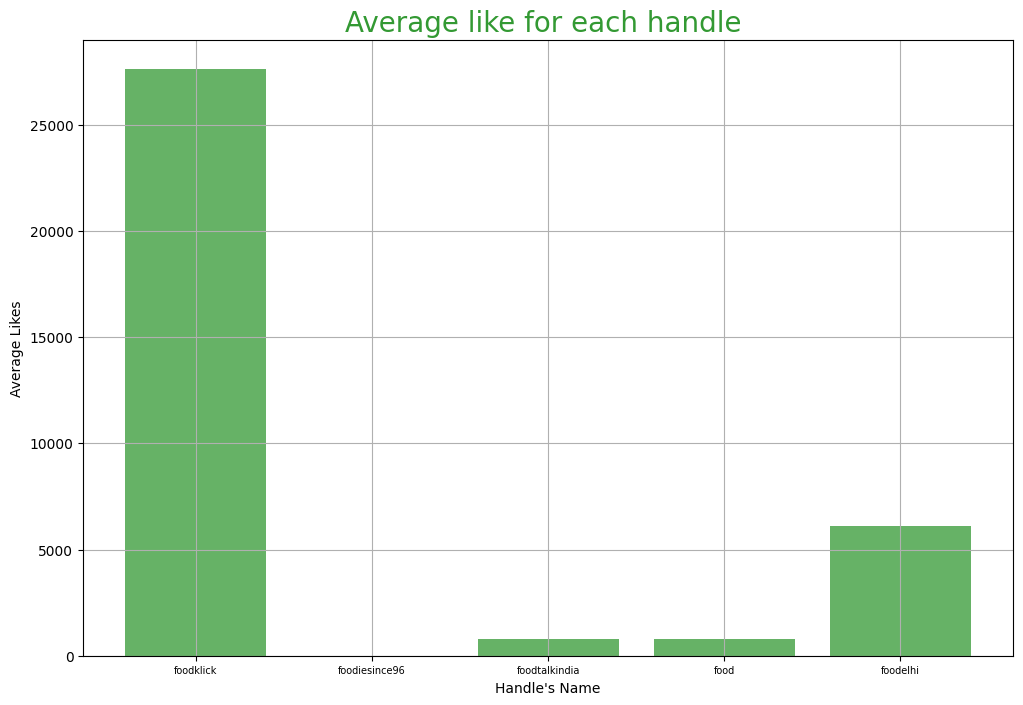

In [31]:
#Plotting Bar Graph for average likes of each handle
#using the average likes for a handle data.
username = list(avg_likes.keys())
avg_like = list(avg_likes.values())
plt.figure(figsize=(12, 8))  # width=12 inches, height=8 inches
plt.bar(username,avg_like,color='g',alpha=0.6)
plt.ylabel("Average Likes",size=10)
plt.xlabel("Handle's Name",size=10)
plt.xticks(fontsize=7)  # Decrease font size of x-axis labels
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

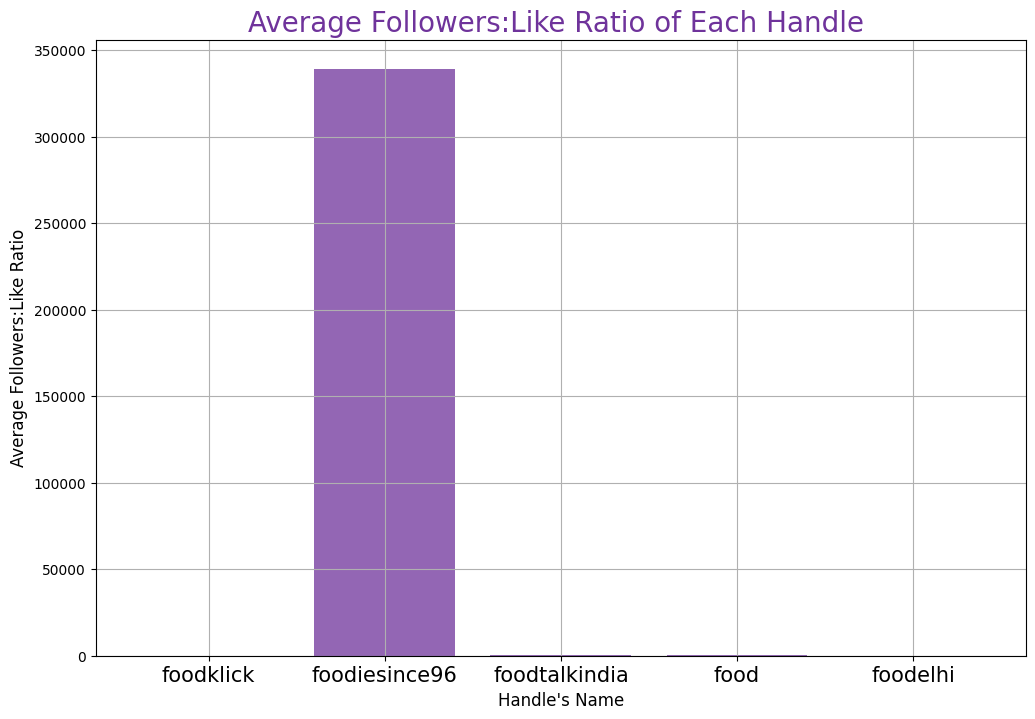

In [32]:
# Plotting Bar Graph for average followers:like ratio of each handle
#using average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
username = list(avg_fol_like_ratio.keys())
avg_like = list(avg_fol_like_ratio.values())
plt.figure(figsize=(12, 8))  # width=12 inches, height=8 inches
plt.bar(username,avg_like,color='Indigo',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Indigo',alpha=0.8)
plt.xticks(fontsize = 15)
plt.grid()
plt.show()